In [1]:
# https://platform.olimpiada-ai.ro/problems/71

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

In [2]:
train = pd.read_csv("/kaggle/input/ancient-pictures/training_set.csv")
valid = pd.read_csv("/kaggle/input/ancient-pictures/validation_set.csv")
test = pd.read_csv("/kaggle/input/ancient-pictures/test_set.csv")

train.shape, valid.shape, test.shape

((500, 7), (500, 6), (500, 6))

In [3]:
train.head(3)

,SampleID,feature1,feature2,feature3,feature4,feature5,label
0,TRAIN_001,0.599758,0.012166,0.209270,1.087926,4.088241,0
1,TRAIN_002,-5.512324,-0.426576,-0.092336,0.501431,3.844389,0
2,TRAIN_003,-3.387749,2.786477,0.195597,1.540859,4.148680,0


In [4]:
train['label'].value_counts()

label
 0    496
-1      2
 1      2
Name: count, dtype: int64

In [5]:
train.iloc[train[train['label'] != 0].index]['label']

46    -1
141    1
182    1
379   -1
Name: label, dtype: int64

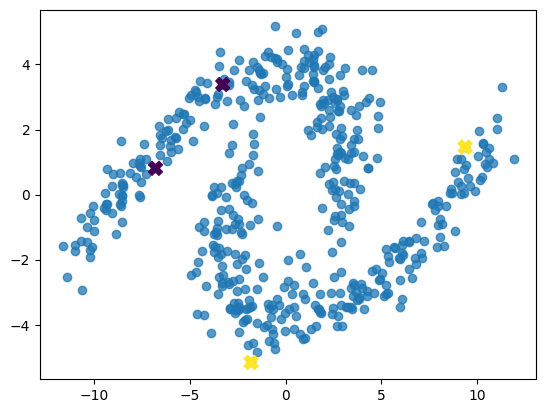

In [6]:
from sklearn.decomposition import PCA

X = train[[f'feature{i}' for i in range(1, 6)]].values

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.75)

known_indices = train[train['label'] != 0].index
X_known_pca = X_pca[known_indices]
X_known_colors = train.iloc[known_indices]['label']

plt.scatter(X_known_pca[:, 0], X_known_pca[:, 1], c=X_known_colors, s=100, marker='X')

plt.show()

In [7]:
X_valid = valid[[f'feature{i}' for i in range(1, 6)]].values
X_valid_pca = pca.transform(X_valid)

X_test = test[[f'feature{i}' for i in range(1, 6)]].values
X_test_pca = pca.transform(X_test)

In [8]:
train.iloc[known_indices[0]]['label']

np.int64(-1)

In [9]:
from sklearn.cluster import SpectralClustering
from sklearn.svm import SVC

clusterer = SpectralClustering(n_clusters=2)
model = SVC()

clusterer.fit(X_pca)

if clusterer.labels_[known_indices[0]] == 1:
    y = 1 - 2*clusterer.labels_
else:
    y = 2*clusterer.labels_ - 1

model.fit(X_pca, y)

y_valid_pred = model.predict(X_valid_pca)
y_test_pred = model.predict(X_test_pca)

In [10]:
subm = pd.DataFrame({
    'SampleID': pd.concat([valid['SampleID'], test['SampleID']]),
    'ClasamentType': ['A'] * len(valid) + ['B'] * len(test),
    'label': np.concat([y_valid_pred, y_test_pred])
})

subm.to_csv("submission.csv", index=False)
subm.head()

,SampleID,ClasamentType,label
0,VALIDATION_001,A,1
1,VALIDATION_002,A,1
2,VALIDATION_003,A,1
3,VALIDATION_004,A,-1
4,VALIDATION_005,A,1
